In [1]:
from functions.data import load_samples_split

x_train, x_test, y_train, y_test = load_samples_split()

In [2]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, verbose=False)

2021-12-16 02:40:53.971396: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-16 02:40:53.979163: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-16 02:40:53.979698: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-16 02:40:53.980764: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
model.evaluate(x_test, y_test, verbose=2)

34/34 - 0s - loss: 0.2259 - accuracy: 0.9268 - 66ms/epoch - 2ms/step


[0.22594782710075378, 0.9268292784690857]

In [4]:
from functions.visual import plot_confusion, plot_accuracy, plot_loss

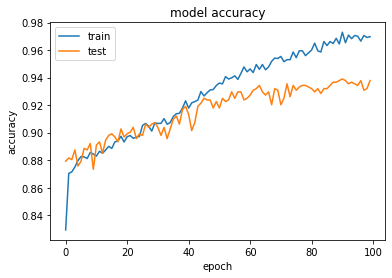

In [5]:
plot_accuracy(history)

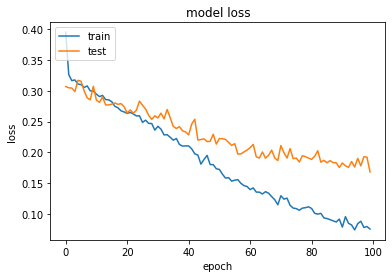

In [6]:
plot_loss(history)

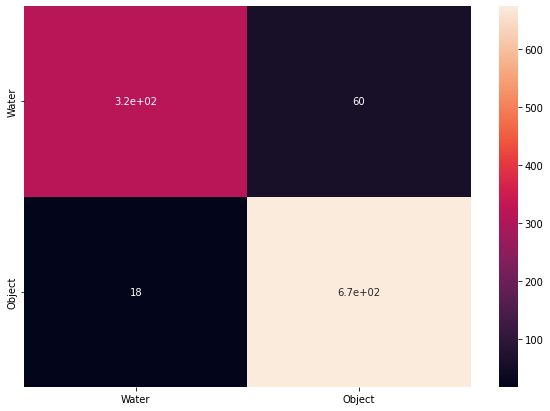

In [7]:
plot_confusion(model, x_test, y_test)

In [9]:
model.save_weights("./checkpoints/checkpoint_epoch100")